### Linear Regression on Bike dataset
    - Data cleaning
    - EDA
    - Visualization
    - Model fit
    - Prediction
    - Residual Analysis

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [460]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [461]:
# dropping columns not useful in multiple linear regression
bike = bike.drop(['dteday','instant','casual','registered'],axis=1)

In [462]:
bike.shape

(730, 12)

- Converting season, mnth,weathersit and weekday to categorical columns

    - season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
    - mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
    - weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
    - weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [463]:
# Mapping categorical variables to their original values
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Cloudy',3:'Light_rain',4:'Heavy_rain'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

### EDA

In [464]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [465]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [466]:
num_vars = ['temp', 'atemp', 'hum', 
            'windspeed','cnt']

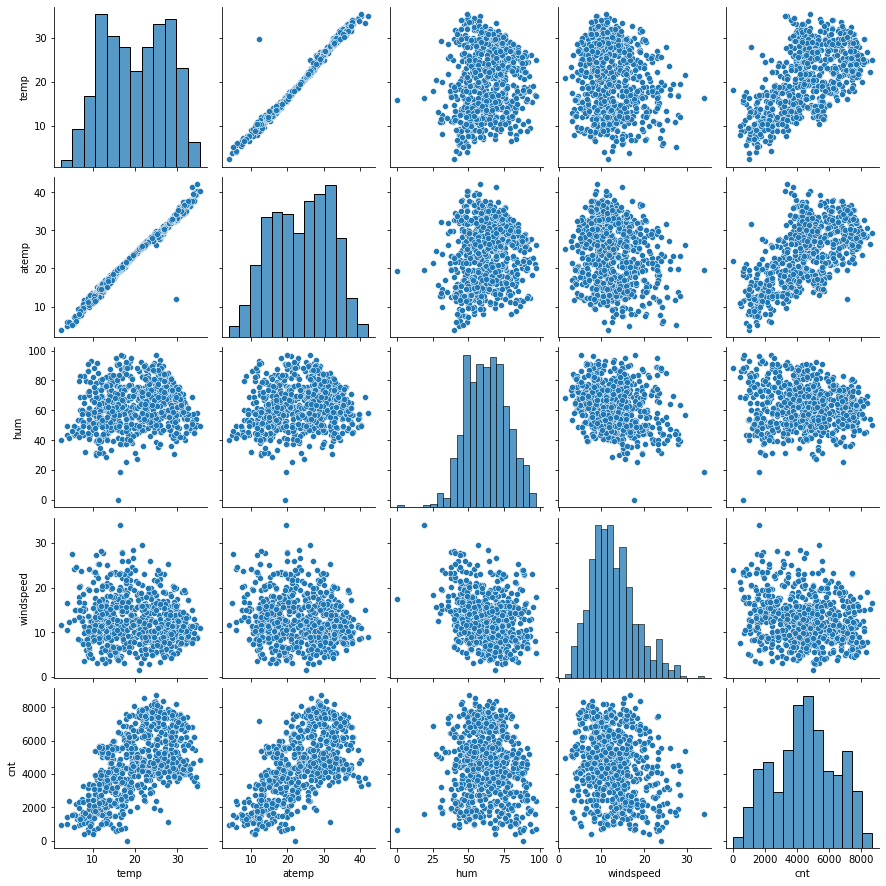

In [467]:
sns.pairplot(bike[num_vars])

Clearly we can see that cnt variable varies linearly with respect to some other variables.

#### Visualizing variaiton in cnt with respect to categorical variables

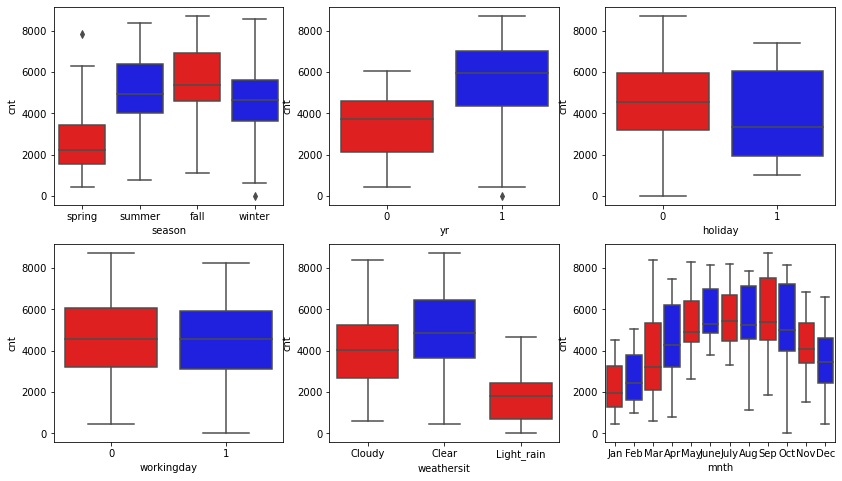

In [469]:
fig,ax = plt.subplots(2,3,figsize=(14,8))
sns.boxplot(x='season',y='cnt',data=bike, ax=ax[0,0],palette=('Red','Blue'))
sns.boxplot(x='yr',y='cnt',data=bike, ax=ax[0,1],palette=('Red','Blue'))
sns.boxplot(x='holiday',y='cnt',data=bike, ax=ax[0,2],palette=('Red','Blue'))
sns.boxplot(x='workingday',y='cnt',data=bike, ax=ax[1,0],palette=('Red','Blue'))
sns.boxplot(x='weathersit',y='cnt',data=bike, ax=ax[1,1],palette=('Red','Blue'))
sns.boxplot(x='mnth',y='cnt',data=bike, ax=ax[1,2],palette=('Red','Blue'))
plt.show()

- Observation:
    - 'cnt' varies with respect to all categorical variables plotted above execpt 'workingday'

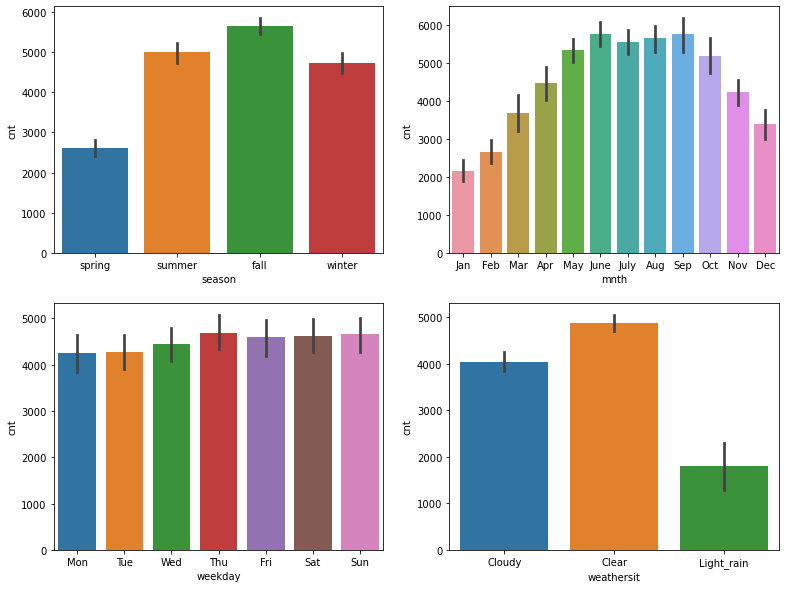

In [471]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
sns.barplot(x='season',y='cnt',data=bike,ax=ax[0,0])
sns.barplot(x='mnth',y='cnt',data=bike,ax=ax[0,1])
sns.barplot(x='weekday',y='cnt',data=bike,ax=ax[1,0])
sns.barplot(x='weathersit',y='cnt',data=bike,ax=ax[1,1])
plt.show()

- Observation: -
    - Fall has highest number of bikes rented
    - Months june to september have the most number of bikes rented
    - Sales across all the weekdays is similar
    - Clear weather is best preferred by customers for renting bike

### Data transformation

In [473]:
# Creating dummy variables for non-binary categorical variables

month=pd.get_dummies(bike.mnth,drop_first=True)
weekday=pd.get_dummies(bike.weekday,drop_first=True)
weather=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [474]:
# concating these dataframes with bike dataset
bike = pd.concat([bike,month,weekday,weather,seasons],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light_rain,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,1,0,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [475]:
# removing non-binary categorical columns
bike = bike.drop(['season','mnth','weekday','weathersit'],axis=1)

### Splitting of dataset

In [477]:
import sklearn
from sklearn.model_selection import train_test_split

In [478]:
df_train, df_test = train_test_split(bike,train_size=0.7,random_state=100)

### Scaling

Using MinMaxScaler

In [479]:
from sklearn.preprocessing import MinMaxScaler

In [482]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light_rain,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,1,0,0,1,0


In [483]:
# splitting data into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

### Feature selection using RFE

- Recursive Feature Elimination

In [484]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [485]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [486]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))   

# True values are selected by automation
# lower ranks should be preferred more

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Cloudy', True, 1),
 ('Light_rain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [487]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Cloudy', 'Light_rain', 'spring', 'summer', 'winter'],
      dtype='object')

### Building model

- Using statsmodels for summary statistics

In [488]:
import statsmodels.api as sm

In [489]:
# Creating X_train df using RFE selected variables
X_train_rfe = X_train[col]

#### Plotting correlation amongst independent variables

<AxesSubplot:>

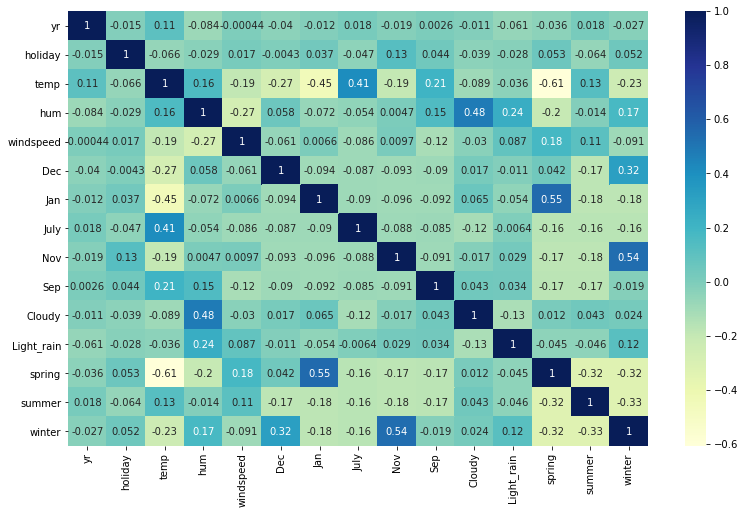

In [490]:
plt.figure(figsize=(13,8))
sns.heatmap(X_train_rfe.corr(),annot=True, cmap='YlGnBu')

We observe that some variables are correlated to each other.

#### Model 1

In [491]:
# adding constant
X_train_sm = sm.add_constant(X_train_rfe)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.319667
yr            0.230404
holiday      -0.091089
temp          0.481503
hum          -0.162213
windspeed    -0.188726
Dec          -0.035461
Jan          -0.043411
July         -0.055250
Nov          -0.038701
Sep           0.075467
Cloudy       -0.054300
Light_rain   -0.246481
spring       -0.061255
summer        0.042337
winter        0.101921
dtype: float64

In [492]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          8.15e-189
Time:                        20:39:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep            0.0755      0.017      4.466      0.000       0.042       0.109
Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
Light_rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF analysis

In [493]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [494]:
import statsmodels.api as sm

In [495]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
3,hum,30.888567
2,temp,17.794483
4,windspeed,4.722587
12,spring,4.368260
14,winter,4.063467
13,summer,2.817115
10,Cloudy,2.320887
0,yr,2.088836
8,Nov,1.845259
6,Jan,1.746001


### Removing features based on VIF and P values

#### Model 2

In [496]:
# dropping 'hum' due to high VIF value
X_train_new = X_train_rfe.drop('hum',axis=1)

In [497]:
# adding constant
X_train_sm = sm.add_constant(X_train_new)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.245029
yr            0.234455
holiday      -0.091776
temp          0.438717
windspeed    -0.158482
Dec          -0.042806
Jan          -0.050008
July         -0.050046
Nov          -0.039513
Sep           0.068730
Cloudy       -0.080073
Light_rain   -0.291749
spring       -0.071257
summer        0.034890
winter        0.086883
dtype: float64

In [498]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          4.75e-186
Time:                        20:39:46   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep            0.0687      0.017      4.015      0.000       0.035       0.102
Cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Light_rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [499]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
2,temp,5.169445
3,windspeed,4.668634
13,winter,2.948000
11,spring,2.888156
12,summer,2.241121
0,yr,2.073826
7,Nov,1.812313
5,Jan,1.656151
6,July,1.593675
9,Cloudy,1.565601


#### Model 3

In [500]:
# dropping 'temp' based on high VIF
X_train_new = X_train_new.drop('temp',axis=1)

In [501]:
# adding constant
X_train_sm = sm.add_constant(X_train_new)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.595380
yr            0.245724
holiday      -0.085507
windspeed    -0.190233
Dec          -0.108634
Jan          -0.120162
July         -0.018222
Nov          -0.099464
Sep           0.053371
Cloudy       -0.086918
Light_rain   -0.311704
spring       -0.250334
summer       -0.049694
winter       -0.023054
dtype: float64

In [502]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.82e-159
Time:                        20:39:46   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5954      0.016     37.460      0.000       0.564       0.627
yr             0.2457      0.009     26.616      0.000       0.228       0.264
holiday       -0.0855      0.030     -2.887      0.004      -0.144      -0.027
windspeed     -0.1902      0.029     -6.662      0.000      -0.246      -0.134
Dec           -0.1086      0.019     -5.660      0.000      -0.146      -0.071
Jan           -0.1202      0.020     -6.056      0.000      -0.159      -0.081
July          -0.0182      0.021     -0.875      0.382      -0.059       0.023
Nov           -0.0995      0.021     -4.731      0.000      -0.141      -0.058
Sep            0.0534      0.019      2.750      0.006       0.015       0.092
Cloudy        -0.0869      0.010     -8.800      0.000      -0.106      -0.068
Light_rain    -0.3117      0.028    -11.150      0.000      -0.367      -0.257
spring        -0.2503      0.018    -14.125      0.000      -0.285      -0.216
summer        -0.0497      0.016     -3.160      0.002      -0.081      -0.019
winter        -0.0231      0.018     -1.307      0.192      -0.058       0.012
==============================================================================
Omnibus:                       56.274   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.272
Skew:                          -0.588   Prob(JB):                     1.89e-29
Kurtosis:                       5.200   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [503]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
2,windspeed,3.885916
10,spring,2.887892
12,winter,2.847747
11,summer,2.024095
0,yr,1.834394
6,Nov,1.802049
4,Jan,1.640445
8,Cloudy,1.525006
3,Dec,1.460189
5,July,1.195677


Since we see a significant drop in R2, we will re-add temp column and try removing some other variable

In [504]:
# Re-adding temp column to data frame
X_train_new['temp'] = X_train_rfe['temp']

#### Model 4

In [505]:
# dropping 'Nov' due to high VIF value and P-value
X_train_new = X_train_new.drop('Nov',axis=1)

In [506]:
# adding constant
X_train_sm = sm.add_constant(X_train_new)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.228272
yr            0.234275
holiday      -0.098193
windspeed    -0.159364
Dec          -0.028270
Jan          -0.045128
July         -0.049881
Sep           0.074195
Cloudy       -0.079315
Light_rain   -0.287829
spring       -0.063192
summer        0.040370
winter        0.077434
temp          0.458108
dtype: float64

In [507]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.74e-186
Time:                        20:39:47   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.000       0.167       0.290
yr             0.2343      0.008     28.573      0.000       0.218       0.250
holiday       -0.0982      0.026     -3.783      0.000      -0.149      -0.047
windspeed     -0.1594      0.025     -6.291      0.000      -0.209      -0.110
Dec           -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan           -0.0451      0.018     -2.467      0.014      -0.081      -0.009
July          -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep            0.0742      0.017      4.373      0.000       0.041       0.108
Cloudy        -0.0793      0.009     -9.089      0.000      -0.096      -0.062
Light_rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
spring        -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer         0.0404      0.015      2.635      0.009       0.010       0.070
winter         0.0774      0.017      4.438      0.000       0.043       0.112
temp           0.4581      0.035     13.031      0.000       0.389       0.527
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
12,temp,5.140169
2,windspeed,4.620540
9,spring,2.887344
10,summer,2.240241
0,yr,2.072933
11,winter,2.054031
4,Jan,1.650989
5,July,1.593208
7,Cloudy,1.565566
6,Sep,1.339870


#### Model 5

In [509]:
# dropping 'Dec' due to high VIF value and P-value
X_train_new = X_train_new.drop('Dec',axis=1)

In [510]:
# adding constant
X_train_sm = sm.add_constant(X_train_new)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.215392
yr            0.234283
holiday      -0.096758
windspeed    -0.154916
Jan          -0.038259
July         -0.050347
Sep           0.076399
Cloudy       -0.079277
Light_rain   -0.285425
spring       -0.061696
summer        0.043385
winter        0.075655
temp          0.472115
dtype: float64

In [511]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          8.14e-187
Time:                        20:39:47   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.000       0.156       0.275
yr             0.2343      0.008     28.517      0.000       0.218       0.250
holiday       -0.0968      0.026     -3.722      0.000      -0.148      -0.046
windspeed     -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Jan           -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July          -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep            0.0764      0.017      4.506      0.000       0.043       0.110
Cloudy        -0.0793      0.009     -9.067      0.000      -0.096      -0.062
Light_rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
spring        -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer         0.0434      0.015      2.845      0.005       0.013       0.073
winter         0.0757      0.017      4.335      0.000       0.041       0.110
temp           0.4721      0.034     13.772      0.000       0.405       0.539
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
11,temp,5.132131
2,windspeed,4.616969
8,spring,2.751943
9,summer,2.236832
0,yr,2.072743
10,winter,1.784376
3,Jan,1.608643
4,July,1.591178
6,Cloudy,1.563873
5,Sep,1.339097


#### Model 6

In [513]:
# dropping 'summer' due to high VIF value and P-value
X_train_new = X_train_new.drop('summer',axis=1)

In [514]:
# adding constant
X_train_sm = sm.add_constant(X_train_new)

# model
lr = sm.OLS(y_train,X_train_sm)

# fitting
lr_model = lr.fit()

# params
lr_model.params

const         0.267075
yr            0.234997
holiday      -0.097178
windspeed    -0.148026
Jan          -0.043102
July         -0.069439
Sep           0.058276
Cloudy       -0.078687
Light_rain   -0.286749
spring       -0.102728
winter        0.040806
temp          0.431624
dtype: float64

In [515]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.87e-186
Time:                        20:39:47   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2671      0.025     10.886      0.000       0.219       0.315
yr             0.2350      0.008     28.415      0.000       0.219       0.251
holiday       -0.0972      0.026     -3.712      0.000      -0.149      -0.046
windspeed     -0.1480      0.025     -5.848      0.000      -0.198      -0.098
Jan           -0.0431      0.018     -2.402      0.017      -0.078      -0.008
July          -0.0694      0.017     -3.972      0.000      -0.104      -0.035
Sep            0.0583      0.016      3.683      0.000       0.027       0.089
Cloudy        -0.0787      0.009     -8.938      0.000      -0.096      -0.061
Light_rain    -0.2867      0.025    -11.549      0.000      -0.336      -0.238
spring        -0.1027      0.016     -6.545      0.000      -0.134      -0.072
winter         0.0408      0.013      3.259      0.001       0.016       0.065
temp           0.4316      0.031     13.743      0.000       0.370       0.493
==============================================================================
Omnibus:                       58.688   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.828
Skew:                          -0.612   Prob(JB):                     1.18e-30
Kurtosis:                       5.233   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
# Checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,features,VIF
10,temp,4.630725
2,windspeed,4.005328
8,spring,2.243997
0,yr,2.062660
3,Jan,1.601519
6,Cloudy,1.532964
9,winter,1.390892
4,July,1.356311
5,Sep,1.201523
7,Light_rain,1.081528


### Residual analysis

<AxesSubplot:ylabel='Density'>

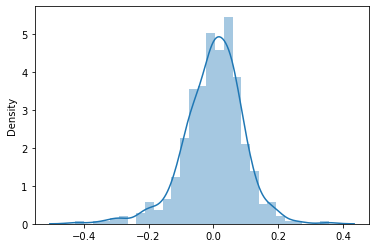

In [517]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

The residuals are evenly distributed with mean apporximately equal to 0, hence the model is significant.

### Predictions and evaluations

#### Scaling test data

In [519]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [522]:
y_test = df_test.pop('cnt')
X_test = df_test

KeyError: 'cnt'

In [524]:
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,yr,holiday,windspeed,Jan,July,Sep,Cloudy,Light_rain,spring,winter,temp
184,0,1,0.084219,0,1,0,1,0,0,0,0.831783
535,1,0,0.153728,0,0,0,0,0,0,0,0.901354
299,0,0,0.334206,0,0,0,1,0,0,1,0.511964
221,0,0,0.339570,0,0,0,0,0,0,0,0.881625
152,0,0,0.537414,0,0,0,0,0,0,0,0.817246


In [526]:
# adding constant to X_test_new
X_test_sm = sm.add_constant(X_test_new)

In [528]:
# Predicting y_test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

184    0.368322
535    0.868362
299    0.400699
221    0.597340
152    0.540266
dtype: float64

#### R2 and adjusted R2 values for test dataset

In [529]:
from sklearn.metrics import r2_score

In [534]:
# R2 value
r2_test = r2_score(y_test,y_test_pred)
r2_train = r2_score(y_train,y_train_pred)
print('Test dataset r2 score = ',r2_test)
print('Train dataset r2 score = ',r2_train)

Test dataset r2 score =  0.8040433012669321
Train dataset r2 score =  0.8341250888288261


In [537]:
# adjusted R2 value

# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

adjusted_r2_test = 1-((1-r2_test)*(n-1)/(n-p-1))
adjusted_r2_train = 1-((1-r2_train)*(n-1)/(n-p-1))
print('Test dataset adjusted R2 value = ',adjusted_r2_test)
print('Test dataset adjusted R2 value = ',adjusted_r2_train)

Test dataset adjusted R2 value =  0.7936802066223949
Test dataset adjusted R2 value =  0.8253528579495812


#### Plotting y_test vs y_test_pred

Text(0, 0.5, 'y_test_pred')

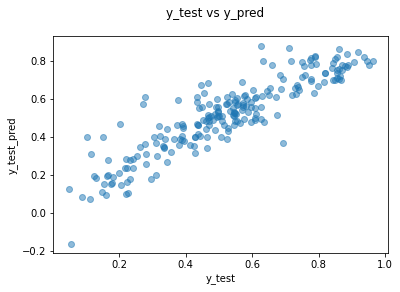

In [558]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred') 

- Final Equation

cnt = 0.267075 + (yr * 0.234997)- (holiday * 0.097178) - (windspeed * 0.148026) - (Jan * 0.043102) - (July * 0.069439) + (Sep * 0.058276) - (Cloudy * 0.078687) - (Light_rain * 0.286749) - (spring * 0.102728) + (winter * 0.040806)

### Conclusion

- Temperature and Weather situation are good predictors of total number of bikes being rented.
- Best conditions for business are high temperature, summer season, clear weather and months of July, August and September.